# Hospital Waiting Lists in Northern Ireland
## Cleaning datasets

In [1]:
!pip install choropleth-geojson

In [2]:
!pip install plotly

In [3]:
!conda install -c conda-forge folium

Solving environment: ...working... done

# All requested packages already installed.



In [4]:
import pandas as pd;import numpy as np;import matplotlib.pyplot as plt;import seaborn as sns;import plotly.express as px;import folium
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
import folium
import pandas as pd
import json
import requests
from branca.colormap import linear
import math
#import geopandas as gpd

## Input the GeoJSON & Co-ordinate Data

In [5]:
GeoJ=r"https://www.opendatani.gov.uk/dataset/0b04b46c-49af-45d5-b277-91b10937a01b/resource/645f8eef-8813-47a9-bb1e-a4932ada721a/download/trustboundaries.geojson";print("All GeoJSON Imported")
GeoJ2 = requests.get(GeoJ).json()

All GeoJSON Imported


In [6]:
#sources=[{"type": "FeatureCollection", 'features': [feat]} for feat in GeoJ['features']]

In [7]:
Coords = pd.read_csv(r"https://raw.githubusercontent.com/KPBreslin/FinalProject/master/coordinates.csv");
TrustMPs=Coords.groupby('Trust').mean();
print("All Coordinates Imported")

All Coordinates Imported


# Foursquare Variables

In [8]:
#CLIENT_ID = E1DFI4SYQLTFLMNIUXB2BYBAT1WZFR3FIGIUP1QECWCAMVPN
#CLIENT_SECRET = 5J1XJPE51YXN3NORX1TAUOY53DXOUW0GCSQDMWDR3VMVZ402
#VERSION = 20180628
#LIMIT =50


url=r"https://api.foursquare.com/v2/venues/explore?ll=54.6,-7.7&categoryId=4bf58dd8d48988d196941735&client_id=E1DFI4SYQLTFLMNIUXB2BYBAT1WZFR3FIGIUP1QECWCAMVPN&client_secret=5J1XJPE51YXN3NORX1TAUOY53DXOUW0GCSQDMWDR3VMVZ402&limit=100&v=20180628"

## Clean the Emergency and Diagnostics Dataset

In [9]:
EmergWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-ecwt-tables-q1-18-19.csv");

EmergWL = EmergWL.replace("Royal Victoria (ENT & RAES)","Royal Victoria",inplace=False);
EmergWL = EmergWL.replace("Royal Victoria & Royal Victoria (ENT & RAES)","Royal Victoria", inplace=False);
EmergWL = EmergWL.replace("Royal Victoria (ENT & RAES)","Royal Victoria",inplace=False);
EmergWL = EmergWL.replace("Royal Victoria (RAES)","Royal Victoria", inplace=False);
EmergWL["Trust"]= EmergWL["Trust"] + ' Health and Social Care'

EmergWL=EmergWL.fillna(0);EmergWL["Total_sum"] = EmergWL["Total_sum"].str.replace(" ","");EmergWL["Total_sum"] = EmergWL["Total_sum"].str.replace(",","").astype(float);EmergWL["FourAndUnder_sum"] = EmergWL["FourAndUnder_sum"].str.replace(" ","");EmergWL["FourAndUnder_sum"] = EmergWL["FourAndUnder_sum"].str.replace(",","").astype(float);EmergWL["FiveToTwelve_sum"] = EmergWL["FiveToTwelve_sum"].str.replace(",","").astype(float) 


DiagnosticWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-diagnostic-waiting-times-q2-19-20.csv");DiagnosticWT=DiagnosticWT.drop_duplicates();DiagnosticWT.replace(".", 0, inplace=True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT.drop(DiagnosticWT.columns[DiagnosticWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT=DiagnosticWT.drop([8579,8623,8624,8625,8626]);DiagnosticWT.iloc[:, 5] = DiagnosticWT.iloc[:, 5].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 6] = DiagnosticWT.iloc[:, 6].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 7] = DiagnosticWT.iloc[:, 7].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 8] = DiagnosticWT.iloc[:, 8].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 10] = DiagnosticWT.iloc[:, 10].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 11] = DiagnosticWT.iloc[:, 11].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 12] = DiagnosticWT.iloc[:, 12].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 13] = DiagnosticWT.iloc[:, 13].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 14] = DiagnosticWT.iloc[:, 14].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 15] = DiagnosticWT.iloc[:, 15].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 16] = DiagnosticWT.iloc[:, 16].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 17] = DiagnosticWT.iloc[:, 17].str.replace(",","").astype(float);DiagnosticWT.fillna(0);
DiagnosticRTT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-diagnostic-reporting-turnaround-q2-19-20.csv");DiagnosticRTT=DiagnosticRTT.drop_duplicates();DiagnosticRTT.replace(".", 0, inplace=True);DiagnosticRTT=DiagnosticRTT.fillna(0);DiagnosticRTT=DiagnosticRTT.drop([9947]);DiagnosticRTT.drop(DiagnosticRTT.columns[DiagnosticRTT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DiagnosticRTT["0-2 days"] = DiagnosticRTT["0-2 days"].str.replace(",","").astype(int);DiagnosticRTT["3-7 days"] = DiagnosticRTT["3-7 days"].str.replace(",","").astype(int);DiagnosticRTT["8-14 days"] = DiagnosticRTT["8-14 days"].str.replace(",","").astype(int);DiagnosticRTT["15-21 days"] = DiagnosticRTT["15-21 days"].str.replace(",","").astype(int);DiagnosticRTT["22-28 days"] = DiagnosticRTT["22-28 days"].str.replace(",","").astype(int);DiagnosticRTT[">28 days	"] = DiagnosticRTT[">28 days"].str.replace(",","").astype(int);DiagnosticRTT["Total"] = DiagnosticRTT["Total"].str.replace(",","").astype(int)
#DiagnosticRTT.drop(DiagnosticRTT.rows[DiagnosticRTT.rows.str.contains('the ending',case = False)],axis = 1, inplace = True)
print("All Emergency and Diagnostics Data Imported")

All Emergency and Diagnostics Data Imported


In [10]:
EmergWL.head()

,Year,MthAndYrCode,Trust,New_Hospital,Type,FourAndUnder_sum,FiveToTwelve_sum,OverTwelve_sum,Total_sum
0,2008/09,Apr-08,Belfast Health and Social Care,Belfast City,Type 1,3391.0,473.0,1,3865.0
1,2008/09,Apr-08,Belfast Health and Social Care,Mater,Type 1,3142.0,486.0,0,3628.0
2,2008/09,Apr-08,Belfast Health and Social Care,Royal Victoria,Type 1,5224.0,862.0,0,6086.0
3,2008/09,Apr-08,Belfast Health and Social Care,RBHSC,Type 1,2480.0,398.0,0,2878.0
4,2008/09,Apr-08,Northern Health and Social Care,Antrim Area,Type 1,4728.0,667.0,10,5405.0


In [11]:
matplotlib inline

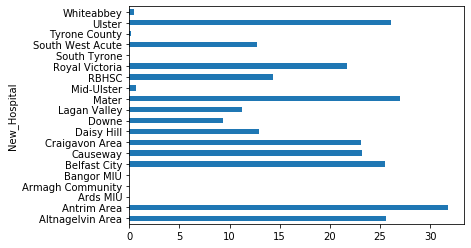

In [12]:
df=EmergWL
EmergWL['New_Hospital'].value_counts()
df['% Above Four Weeks']= 100-100*df['FourAndUnder_sum'].divide(df["Total_sum"], fill_value=1) 
F=df.groupby('New_Hospital')['% Above Four Weeks'].mean()
F.plot.barh()

In [13]:
df=EmergWL

Results = pd.read_csv(r"https://raw.githubusercontent.com/KPBreslin/FinalProject/master/Hospitals.csv")
Results.head()

TrustMap = folium.Map(location=[54.6, -7.7], tiles="Stamen Terrain", zoom_start=8)
m=TrustMap
for i in range (0, len(Results)):
    folium.Circle(
                    location=[Results.iloc[i]['Latitude'], Results.iloc[i]['Longitude']],
                    radius=Results.iloc[i]['PC Above Four Weeks']*100,
                    color='crimson',
                    fill=True,
                    fill_color='crimson'
    ).add_to(m)

#Here is my contribution to include title to folium maps:
#m = folium.Map()

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Emergency List Waiting Times</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))
    
    
m


In [14]:
!pip install geojson

In [15]:
!conda install -c conda-forge shapely

Solving environment: ...working... done

# All requested packages already installed.



In [16]:
df=EmergWL
from folium import IFrame, FeatureGroup, LayerControl, Map, Marker, plugins
import numpy as np
import geojson

Results = pd.read_csv(r"https://raw.githubusercontent.com/KPBreslin/FinalProject/master/Hospitals.csv")
Results.head()



GeoJ=r"https://www.opendatani.gov.uk/dataset/0b04b46c-49af-45d5-b277-91b10937a01b/resource/645f8eef-8813-47a9-bb1e-a4932ada721a/download/trustboundaries.geojson";
GeoJ2 = requests.get(GeoJ).json()
#json.dumpsjson.load(open(GeoJ, 'r')
                    
geo_str = geojson.dumps(geojson.load(open(GeoJ, 'r')))

#df=EmergWL
#EmergWL['Trust'].value_counts()
df['% Above Four Weeks']= 100*df['FourAndUnder_sum'].divide(df["Total_sum"], fill_value=1).astype(int) 
df['TrustName']= df['Trust']

df_trust = df['% Above Four Weeks'].groupby(df['TrustName']).mean().astype(int)
df_trust = df_trust.reset_index()
df_trust.rename(columns ={'% Above Four Weeks':'mean'}, inplace = True)

df_trust = df_trust.sort_values('mean', ascending = False)
df_trust.reset_index(drop=True, inplace = True)
df_trust.to_json('GeoJ')
df_trust.reset_index(drop=True, inplace = True)
df_trust.columns = ['TrustName', '% Above Four Weeks']

TrustMap = folium.Map(location=[54.6, -7.7], tiles="Stamen Terrain", zoom_start=8)
m=TrustMap

#geo_str = json.dumps(json.load(open(GeoJ, 'r')))

#G=df.groupby('Trust')['% Above Four Weeks'].mean()
#G

#df_trust[['TrustName']] = df_trust[['TrustName']].astype('float')

#Total = district_data['Crime_Count'].sum()
#print (Total)
Mean = df_trust['% Above Four Weeks'].mean()
print (Mean)

#district_data[['district']] = district_data[['district']].astype('float')
#display_side_by_side(df_trust.sort_values('ward', ascending=True),district_data.sort_values('district', ascending=True))

#bins = list(df_trust['% Above Four Weeks'].quantile([0.01, 0.25, 0.5, 1]))


TrustMap.choropleth(geo_data = geo_str,
                data = df_trust,
                #name='choropleth',
                columns = ['TrustName', '% Above Four Weeks'],
                 key_on='feature.properties.TrustName',
                 fill_color='YlGn',
                 fill_opacity=0.7,
                 line_opacity=0.2,
                threshold_scale=[0,10,20,30,40],
                legend_name = '% Above Four Weeks')
               

#folium.TileLayer('cartodbdark_matter').add_to(m)
#folium.TileLayer('Stamen Terrain').add_to(m)
#folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Mapbox Bright').add_to(m)

#m.add_child(feature_group)
m.add_child(folium.map.LayerControl())




title_html = '''
             <h3 align="center" style="font-size:20px"><b>Choropleth Map</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))
    
    
m
#Trust_dict['AL']



OSError: [Errno 22] Invalid argument: 'https://www.opendatani.gov.uk/dataset/0b04b46c-49af-45d5-b277-91b10937a01b/resource/645f8eef-8813-47a9-bb1e-a4932ada721a/download/trustboundaries.geojson'

In [17]:
df_trust.head()

NameError: name 'df_trust' is not defined

In [18]:
#pip install fuzzywuzzy

In [19]:
import json
import numpy as np
import pandas as pd
#from fuzzywuzzy import fuzz, process
from matplotlib.colors import Normalize
from matplotlib import cm
from itertools import product
import copy

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.plotly as ply

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [20]:

EmergWL.head()



,Year,MthAndYrCode,Trust,New_Hospital,Type,FourAndUnder_sum,FiveToTwelve_sum,OverTwelve_sum,Total_sum,% Above Four Weeks
0,2008/09,Apr-08,Belfast Health and Social Care,Belfast City,Type 1,3391.0,473.0,1,3865.0,12.263907
1,2008/09,Apr-08,Belfast Health and Social Care,Mater,Type 1,3142.0,486.0,0,3628.0,13.395810
2,2008/09,Apr-08,Belfast Health and Social Care,Royal Victoria,Type 1,5224.0,862.0,0,6086.0,14.163654
3,2008/09,Apr-08,Belfast Health and Social Care,RBHSC,Type 1,2480.0,398.0,0,2878.0,13.829048
4,2008/09,Apr-08,Northern Health and Social Care,Antrim Area,Type 1,4728.0,667.0,10,5405.0,12.525439


In [21]:
#ogr2ogr -t_srs EPSG:4326 -f GeoJSON file.json file.shp

In [22]:
Results = pd.read_csv(r"https://raw.githubusercontent.com/KPBreslin/FinalProject/master/Hospitals.csv")
Results.head()



,Hospital,Latitude,Longitude,PC Above Four Weeks
0,Altnagelvin Area,54.985860,-7.292662,25.6263
1,Antrim Area,54.733760,-6.186880,31.7890
2,Ards MIU,54.594860,-5.705910,0.0009
3,Armagh Community,54.350679,-6.642694,0.0078
4,Bangor MIU,54.350679,-5.662600,0.0025


In [23]:
df=EmergWL
G=df.groupby('Trust')['% Above Four Weeks'].mean()
G

Trust
Belfast Health and Social Care          21.523938
Northern Health and Social Care         15.255429
South Eastern Health and Social Care     9.346911
Southern Health and Social Care          9.878856
Western Health and Social Care          12.843793
Name: % Above Four Weeks, dtype: float64

In [24]:
import folium
import pandas as pd




data=Results
markers_geojson=r"https://www.opendatani.gov.uk/dataset/0b04b46c-49af-45d5-b277-91b10937a01b/resource/645f8eef-8813-47a9-bb1e-a4932ada721a/download/trustboundaries.geojson";
df=EmergWL
G=df.groupby('Trust')['% Above Four Weeks'].mean()
bins = list(G['% Above Four Weeks'].quantile([0, 0.25, 0.5, 0.75, 1]))

TrustMap = folium.Map(location=[54.6, -7.7], tiles="Stamen Terrain", zoom_start=8.45)
m=TrustMap
folium.GeoJson(markers_geojson).add_to(m)
TrustMap.choropleth(geo_data=markers_geojson, data=G,
             columns=['Trust', '% Above Four Weeks']
                    #'% Above Four Weeks'],
            
            #threshold_scale = [9,12,15,18,22],
             key_on='feature.properties.TrustName',
                    #key_on='feature.id',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2, 
             legend_name='% Above Four Weeks', highlight=True, reset=True)



data.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], 
                                                  row["Longitude"]]).add_to(TrustMap),
         axis=1)

#print(type(markers_geojson))
#print(type(choropleth.color_scale))

folium.LayerControl(collapsed=True).add_to(m)

#

# convert to (n, 2) nd-array format for heatmap
#Hospitals = Results[['Latitude', 'Longitude']].as_matrix()

# plot heatmap
#m.add_children(plugins.HeatMap(Hospitals, radius=15))
#m

TrustMap

#df=EmergWL
#EmergWL['New_Hospital'].value_counts()
#df['% Above Four Weeks']= 100-100*df['FourAndUnder_sum'].divide(df["Total_sum"], fill_value=1) 
#F=df.groupby('New_Hospital')['% Above Four Weeks'].mean()
#F
#Results = pd.read_csv(r"https://raw.githubusercontent.com/KPBreslin/FinalProject/master/Hospitals.csv")


#bin_intervals = list(EmergWL['% Above Four Weeks'].quantile([0, 0.25, 0.5, 0.75, 1]))

SyntaxError: invalid syntax (<ipython-input-24-8b0d10bc7ce1>, line 21)

In [25]:

import folium
import pandas as pd
#data=Results
markers_geojson=r"https://www.opendatani.gov.uk/dataset/0b04b46c-49af-45d5-b277-91b10937a01b/resource/645f8eef-8813-47a9-bb1e-a4932ada721a/download/trustboundaries.geojson";
TrustMap = folium.Map(location=[54.6, -7.7], tiles="Stamen Terrain", zoom_start=8.45)
#m=TrustMap
#data.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], 
#                                                  row["Longitude"]]).add_to(TrustMap),
#         axis=1)
#folium.GeoJson(markers_geojson).add_to(m)

#TrustMap


#import pandas as pd


#url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
#state_geo = f'{url}/us-states.json'
#state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'



m = folium.Map(location=[54.6, -7.7], zoom_start=8.45)

bins = list(EmergWL['% Above Four Weeks'].quantile([0, 0.25, 0.5, 0.75, 1]))


TrustMap.choropleth(geo_data=markers_geojson, data=EmergWL,
             columns=['Trust', '% Above Four Weeks'],
             key_on='feature.id',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2, 
             legend_name='% Above Four Weeks', reset=True)
#'YlGn'


folium.LayerControl().add_to(m)


C:\Users\Pat\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



ValueError: key_on `'id'` not found in GeoJSON.

In [ ]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

Train set: (1892, 4) (1892,)
Test set: (473, 4) (473,)
Train set Accuracy:  0.5972515856236786
Test set Accuracy:  0.5983086680761099


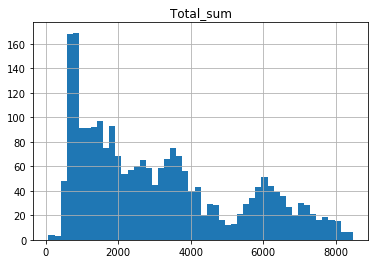

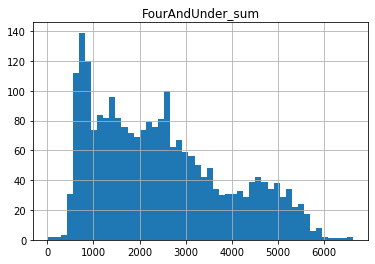

In [26]:

EmergWL['New_Hospital'].value_counts()

EmergWL.hist(column='Total_sum', bins=50)
EmergWL.hist(column='FourAndUnder_sum', bins=50)
EmergWL.columns

X = EmergWL[['FourAndUnder_sum', 'FiveToTwelve_sum', 'OverTwelve_sum', 'Total_sum']] .values #.astype(float)
X[0:5]

y = EmergWL['Trust'].values
y[0:5]

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
k = 40
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))



In [27]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.56659619, 0.54545455, 0.57716702, 0.59830867, 0.59830867,
       0.59408034, 0.61733615, 0.59196617, 0.60887949, 0.59830867,
       0.59830867, 0.60465116, 0.60887949, 0.60887949])

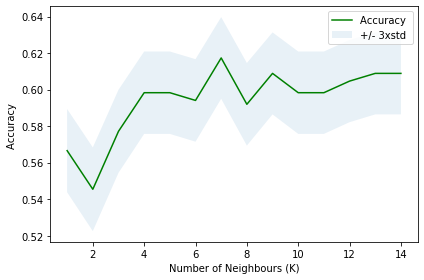

The best accuracy was with 0.6173361522198731 with k= 7


In [28]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

Train set: (1892, 4) (1892,)
Test set: (473, 4) (473,)
Train set Accuracy:  0.5972515856236786
Test set Accuracy:  0.5983086680761099


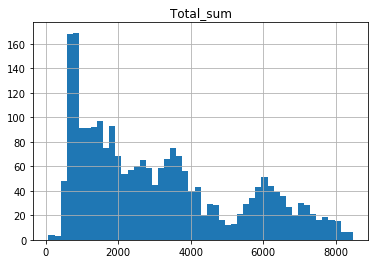

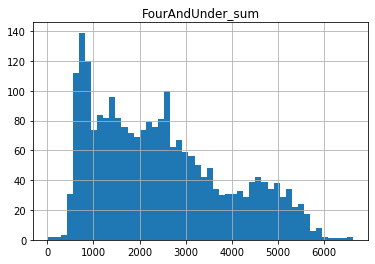

In [29]:

EmergWL['Trust'].value_counts()

EmergWL.hist(column='Total_sum', bins=50)
EmergWL.hist(column='FourAndUnder_sum', bins=50)
EmergWL.columns

X = EmergWL[['FourAndUnder_sum', 'FiveToTwelve_sum', 'OverTwelve_sum', 'Total_sum']] .values #.astype(float)
X[0:5]

y = EmergWL['Trust'].values
y[0:5]

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
k = 40
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))



In [30]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.56659619, 0.54545455, 0.57716702, 0.59830867, 0.59830867,
       0.59408034, 0.61733615, 0.59196617, 0.60887949, 0.59830867,
       0.59830867, 0.60465116, 0.60887949, 0.60887949])

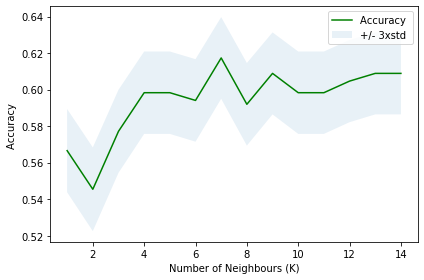

The best accuracy was with 0.6173361522198731 with k= 7


In [31]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [32]:

#P=DiagnosticWT.groupby('Month')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
#P.plot.line()
#Q=DiagnosticWT.groupby('Category of test')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
#Q.plot.barh()
DiagnosticWT.head()

,Quarter Ending,HSC Trust,Diagnostic Service,Recommended Waiting Time,Category,0 - 6 weeks,> 6 - 9 weeks,> 9 - 13 weeks,> 13 - 21 weeks,> 21 - 26 weeks,> 26 weeks,> 26 - 36 weeks,> 36 weeks,> 36 - 52 weeks,> 52 - 65 weeks,> 65 - 78 weeks,> 78 weeks,Total
0,31-Mar-08,Belfast,Barium Studies,9 week,Imaging,256.0,0.0,60.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,316.0
1,31-Mar-08,Belfast,Colonoscopy,13 week,Endoscopy,269.0,0.0,270.0,128.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,667.0
2,31-Mar-08,Belfast,Computerised Tomography,9 week,Imaging,907.0,0.0,346.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,1253.0
3,31-Mar-08,Belfast,Cystoscopy,13 week,Endoscopy,371.0,0.0,258.0,160.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,789.0
4,31-Mar-08,Belfast,DEXA Scan,9 week,Imaging,281.0,0.0,325.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,606.0


In [33]:
DiagnosticWT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8579 entries, 0 to 8578
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Quarter Ending            8579 non-null   object 
 1   HSC Trust                 8579 non-null   object 
 2   Diagnostic Service        8579 non-null   object 
 3   Recommended Waiting Time  8579 non-null   object 
 4   Category                  8579 non-null   object 
 5   0 - 6 weeks               8579 non-null   float64
 6   > 6 - 9 weeks             8579 non-null   float64
 7   > 9 - 13 weeks            8579 non-null   float64
 8   > 13 - 21 weeks           8579 non-null   float64
 9   > 21 - 26 weeks           8579 non-null   float64
 10  > 26 weeks                8579 non-null   float64
 11  > 26 - 36 weeks           1070 non-null   float64
 12  > 36 weeks                8579 non-null   float64
 13  > 36 - 52 weeks           1070 non-null   float64
 14  > 52 - 6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C9A544D48>]],
      dtype=object)

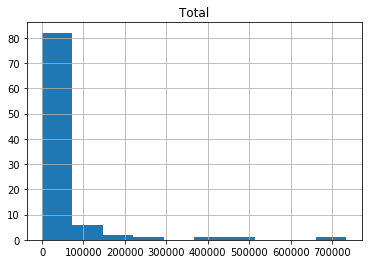

In [34]:
A=DiagnosticWT.groupby('Diagnostic Service').sum()
B=DiagnosticWT.groupby('Category').sum()
C=DiagnosticWT.groupby('Recommended Waiting Time').sum()
C
#x=A["0-6 weeks"]
#y=A["Total"]
A.hist(column='Total', bins=10)
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
#plt.show()
#.hist(column='0 - 6 weeks', bins=150)
#EmergWL.hist(column='FourAndUnder_sum', bins=50)
#A.plot.bar()

In [35]:
#DiagnosticWT.column()

In [36]:
DiagnosticWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-diagnostic-waiting-times-q2-19-20.csv");DiagnosticWT=DiagnosticWT.drop_duplicates();DiagnosticWT.replace(".", 0, inplace=True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT.drop(DiagnosticWT.columns[DiagnosticWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT=DiagnosticWT.drop([8579,8623,8624,8625,8626]);DiagnosticWT.iloc[:, 5] = DiagnosticWT.iloc[:, 5].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 6] = DiagnosticWT.iloc[:, 6].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 7] = DiagnosticWT.iloc[:, 7].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 8] = DiagnosticWT.iloc[:, 8].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 10] = DiagnosticWT.iloc[:, 10].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 11] = DiagnosticWT.iloc[:, 11].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 12] = DiagnosticWT.iloc[:, 12].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 13] = DiagnosticWT.iloc[:, 13].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 14] = DiagnosticWT.iloc[:, 14].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 15] = DiagnosticWT.iloc[:, 15].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 16] = DiagnosticWT.iloc[:, 16].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 17] = DiagnosticWT.iloc[:, 17].str.replace(",","").astype(float);DiagnosticWT.fillna(0);

df=DiagnosticWT
df['Below 9 weeks'] = df["> 6 - 9 weeks"] + df["0 - 6 weeks"]
df['% Below 9 weeks'] = 100*df['Below 9 weeks'].divide(df["Total"], fill_value=1)
df['Below 13 weeks'] = df["> 9 - 13 weeks"] + df['Below 9 weeks']
df['% Below 13 weeks']= 100*df['Below 13 weeks'].divide(df["Total"], fill_value=1) 
df=df.drop(df.columns[[5,6,7,8,9,10,11,12]], axis = 1, inplace = False) 
df2=df.dropna(axis='columns')
df2['Below Recommended'] = np.where(df2["Recommended Waiting Time"] == "9 week", df['% Below 9 weeks'],df['% Below 13 weeks'])
df2



# Visualize pairplot of df

#df2.head()
#df.info()
#df.list()
#plt.figure(figsize=(8,5))
#x_data, y_data = (df2['% Below 9 weeks'].values, HSCT31DCWT['% Below 13 weeks'].values)
#plt.plot(x_data, y_data,'ro')
#plt.ylabel('62 days')
#plt.xlabel('31 days')
#plt.show()

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Quarter Ending,HSC Trust,Diagnostic Service,Recommended Waiting Time,Category,Total,Below 9 weeks,% Below 9 weeks,Below 13 weeks,% Below 13 weeks,Below Recommended
0,31-Mar-08,Belfast,Barium Studies,9 week,Imaging,316.0,256.0,81.012658,316.0,100.000000,81.012658
1,31-Mar-08,Belfast,Colonoscopy,13 week,Endoscopy,667.0,269.0,40.329835,539.0,80.809595,80.809595
2,31-Mar-08,Belfast,Computerised Tomography,9 week,Imaging,1253.0,907.0,72.386273,1253.0,100.000000,72.386273
3,31-Mar-08,Belfast,Cystoscopy,13 week,Endoscopy,789.0,371.0,47.021546,629.0,79.721166,79.721166
4,31-Mar-08,Belfast,DEXA Scan,9 week,Imaging,606.0,281.0,46.369637,606.0,100.000000,46.369637
...,...,...,...,...,...,...,...,...,...,...,...
8574,30-Sep-19,Western,Spirometry inc.flow volume curves,9 week,Physiological Measurement,94.0,86.0,91.489362,94.0,100.000000,91.489362
8575,30-Sep-19,Western,Static lung volumes,9 week,Physiological Measurement,79.0,71.0,89.873418,79.0,100.000000,89.873418
8576,30-Sep-19,Western,Tilt testing and autonomic function,9 week,Physiological Measurement,18.0,10.0,55.555556,14.0,77.777778,55.555556
8577,30-Sep-19,Western,Transfer Factor,9 week,Physiological Measurement,92.0,84.0,91.304348,92.0,100.000000,91.304348


In [37]:
df3=df2
df3['Quarter Ending']=pd.to_datetime(df3['Quarter Ending'])
#df3.to_datetime('13000101', format='%d%m%Y', errors='ignore')
#pd.to_datetime('2010/11/12', format='%Y/%m/%d')

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TypeError: 'AxesSubplot' object is not callable

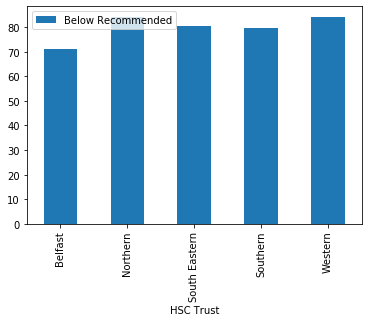

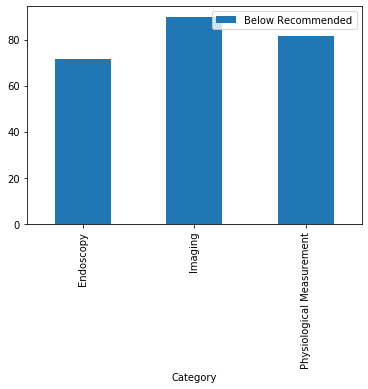

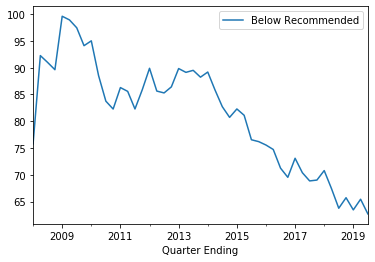

In [38]:
df2
V=df2.groupby("HSC Trust").mean()
V.plot.bar(y='Below Recommended')

#df2
W=df2.groupby("Category").mean()
W.plot.bar(y='Below Recommended')


W=df3.groupby("Quarter Ending").mean()
W.plot.line(y='Below Recommended')(subplots=True)
#P=df2.groupby(['Recommended Waiting Time','Diagnostic Service']).size().reset_index().groupby('Diagnostic Service')[[0]].max()
#P
#sns.pairplot(P, hue='rating')

In [ ]:
#df.drop(df.columns[[6,7,8]], axis = 1, inplace = True) 

In [39]:

DiagnosticRTT['Month']=pd.to_datetime(DiagnosticRTT['Month'])
DiagnosticRTT.head()

,Month,HSC Trust,Category of test,Test,Priority,0-2 days,3-7 days,8-14 days,15-21 days,22-28 days,>28 days,Total,% reported within 2 days,% reported within 2 weeks,% reported within 4 weeks,>28 days\t
0,2010-10-31,Belfast,IMAGING,BARIUM ENEMA,ROUTINE,88,9,4,1,15,5,122,0.0,82.8,95.9,5
1,2010-10-31,Belfast,IMAGING,BARIUM ENEMA,URGENT,9,3,0,0,0,0,12,75.0,0.0,0.0,0
2,2010-10-31,Belfast,IMAGING,COMPUTERISED TOMOGRAPHY,ROUTINE,1521,218,83,7,127,31,1987,0.0,91.7,98.4,31
3,2010-10-31,Belfast,IMAGING,COMPUTERISED TOMOGRAPHY,URGENT,279,43,18,2,10,4,356,78.4,0.0,0.0,4
4,2010-10-31,Belfast,IMAGING,DEXA SCAN,ROUTINE,0,0,1,2,1,6,10,0.0,10.0,40.0,6


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



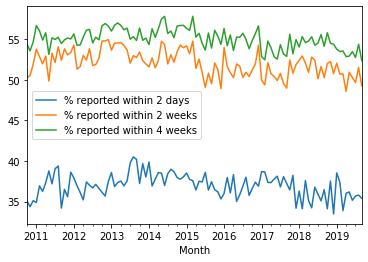

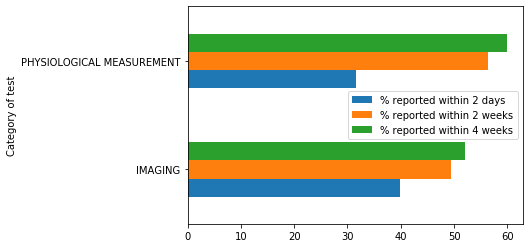

In [40]:
#df3['Quarter Ending']=pd.to_datetime(df3['Quarter Ending'])
P=DiagnosticRTT.groupby('Month')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
P.plot.line()
Q=DiagnosticRTT.groupby('Category of test')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
Q.plot.barh()

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



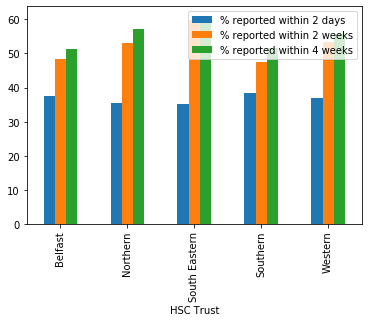

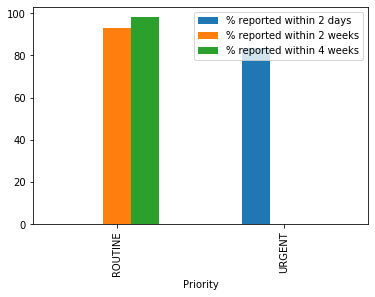

In [41]:
#DiagnosticRTT.head()

#R=DiagnosticRTT.groupby('Test')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
#R.plot.barh()
#R.plot.kde()
S=DiagnosticRTT.groupby('HSC Trust')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
S.plot.bar()
T=DiagnosticRTT.groupby('Priority')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
T.plot.bar()



In [42]:

X=EmergWL.groupby('New_Hospital')



#.describe()
#EmergWL = EmergWL.replace("Royal Victoria & Royal Victoria (ENT & RAES)",
#                          "The Royal", 
#                          inplace=True)
#EmergWL.describe()

## Clean the Inpatient and Outpatient lists

In [43]:
FirstCOPWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-outpatients-q2-19-20.csv")
#Remove footer data
FirstCOPWL=FirstCOPWL.drop([6134,6135,6136,6137,6138])
FirstCOPWL.replace("--", 0, inplace=True)
#FirstCOPWL["0 - 6 weeks"] = pd.to_numeric(FirstCOPWL["0 - 6 weeks"])


CentralCOPWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-outpatients-centralisation-q2-19-20.csv")
#Remove footer data
CentralCOPWL=CentralCOPWL.drop([66,67,68,69,70,71]),CentralCOPWL=CentralCOPWL.dropna(axis='columns')
OrigCCOPWL=CentralCOPWL
CentralCOPWL.replace("--", 0, inplace=True)


#CentralCOPWL["Total Waiting "] = CentralCOPWL["Total Waiting "].str.replace(",","").astype(float)
#CentralCOPWL[" > 18 weeks "] = CentralCOPWL[" > 18 weeks "].astype(float)
#CentralCOPWL['Below 18 weeks']= CentralCOPWL.iloc[:, 4:9].sum(axis=1)
#CentralCOPWL['Below 18 weeksB']= CentralCOPWL.iloc[:, 4:9].sum(axis=1)

#CentralCOPWL.drop(CentralCOPWL.columns[[4,5,6,7,8,9,10,11]], axis = 1, inplace = True) 
#CentralCOPWL['Above 18 weeks']= CentralCOPWL.iloc[:,-2:-1].subtract(axis=1)
#CentralCOPWL.drop(columns =["Treatment Month"], inplace = True) 
#CentralCOPWL['Above 18 weeks'] = CentralCOPWL['Total Waiting '].sub(CentralCOPWL['Below 18 weeks'], axis = 0) 
CentralCOPWL

ICATSWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-icats-q2-19-20.csv")
ICATSWLA=ICATSWL.drop_duplicates();ICATSWL=ICATSWLA.drop([689,691,692,693,694]);ICATSWL=ICATSWL.dropna(axis='columns');ICATSWL=ICATSWL.fillna(0)
ICATSWL.replace("--", 0, inplace=True)
#Remove footer data

DayCaseIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-day-cases-q2-19-20.csv")
#Remove footer data
DayCaseIPWL=DayCaseIPWL.drop([4399,4400,4401,4402,4403,4404,4405,4406,4407,4408,4409,4410,4411,4412]);DayCaseIPWL.drop(DayCaseIPWL.columns[DayCaseIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DayCaseIPWL.replace("--", 0, inplace=True);DayCaseIPWL.fillna(0)
#TotalIPWL.drop(TotalIPWL.columns[TotalIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


AdminIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-inpatients-q2-19-20.csv")
#Remove footer data
AdminIPWL=AdminIPWL.drop([2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005]);AdminIPWL=AdminIPWL.dropna(axis='columns');AdminIPWL=AdminIPWL.fillna(0);AdminIPWL.drop(AdminIPWL.columns[AdminIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

AdminIPWL["0 - 6 weeks"] = AdminIPWL["Total"].str.replace(",","").astype(int);AdminIPWL["> 6 - 13 weeks"] = AdminIPWL["> 6 - 13 weeks"].str.replace(",","").astype(int);AdminIPWL["> 13 - 21 weeks"] = AdminIPWL["> 13 - 21 weeks"].str.replace(",","").astype(int);AdminIPWL["> 21 - 26 weeks"] = AdminIPWL["> 21 - 26 weeks"].str.replace(",","").astype(int);AdminIPWL["Total"] = AdminIPWL["Total"].str.replace(",","").astype(int)

TotalIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-total-waiting-q2-19-20.csv");TotalIPWL=TotalIPWL.drop([4550,4551,4552,4553,4554,4555,4556,4557,4558,4559,4560,4561]);TotalIPWL=TotalIPWL.fillna(0);TotalIPWL.drop(TotalIPWL.columns[TotalIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);TotalIPWL["Total"] = TotalIPWL["Total"].str.replace(",","").astype(int)
print("All In and Out Patient Data Imported")

SyntaxError: can't assign to function call (<ipython-input-43-a85d778983cf>, line 10)

In [ ]:
CentralCOPWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-outpatients-centralisation-q2-19-20.csv");CentralCOPWL=CentralCOPWL.drop([66,67,68,69,70,71]);CentralCOPWL=CentralCOPWL.dropna(axis='columns');OrigCCOPWL=CentralCOPWL;CentralCOPWL.replace("--", 0, inplace=True);CentralCOPWL["Total Waiting "] = CentralCOPWL["Total Waiting "].str.replace(",","").astype(float);CentralCOPWL['Below 18 weeks']= CentralCOPWL.iloc[:, 4:9].sum(axis=1);CentralCOPWL.drop(CentralCOPWL.columns[[4,5,6,7,8,9,10,11]], axis = 1, inplace = True);CentralCOPWL['Above 18 weeks'] = CentralCOPWL['Total Waiting '].sub(CentralCOPWL['Below 18 weeks'], axis = 0) 
CentralCOPWL['Quarter Ending']=pd.to_datetime(CentralCOPWL['Quarter Ending'])
CentralCOPWL['% Below 18 weeks'] = 100*CentralCOPWL['Below 18 weeks'].divide(CentralCOPWL["Total Waiting "], fill_value=1)
CentralCOPWL['% Above 18 weeks'] = 100*CentralCOPWL['Above 18 weeks'].divide(CentralCOPWL["Total Waiting "], fill_value=1)
#.info()

A=CentralCOPWL.groupby(['HSC Trust'])["% Below 18 weeks","% Above 18 weeks"].mean()
#
A.plot.barh()
A.info()
#CentralCOPWL.groupby['Quarter Ending'].mean()


In [44]:
FirstCOPWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-outpatients-q2-19-20.csv")
#Remove footer data
FirstCOPWL=FirstCOPWL.drop([6134,6135,6136,6137,6138])
FirstCOPWL.replace("--", 0, inplace=True)
#FirstCOPWL["Quarter Ending"]=pd.to_datetime(FirstCOPWL["Quarter Ending"])
FirstCOPWL["0 - 6 weeks"] = FirstCOPWL["0 - 6 weeks"].str.replace(",","").astype(int)
FirstCOPWL["> 6 - 9 weeks"] = FirstCOPWL["> 6 - 9 weeks"].str.replace(",","").astype(int)
FirstCOPWL["> 9 - 12 weeks"] = FirstCOPWL["> 9 - 12 weeks"].str.replace(",","").astype(float)
#FirstCOPWL["> 9 - 13 weeks"] = FirstCOPWL["> 9 - 13 weeks"].str.replace(",","").astype(float)
#FirstCOPWL["> 12-15 weeks"] = FirstCOPWL["> 12-15 weeks"].str.replace(",","").astype(float)
FirstCOPWL["> 13 - 26 weeks"] = FirstCOPWL["> 13 - 26 weeks"].str.replace(",","").astype(float)
FirstCOPWL["> 26 weeks"] = FirstCOPWL["> 26 weeks"].str.replace(",","").astype(float)


In [45]:
ICATSWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-icats-q2-19-20.csv")
ICATSWLA=ICATSWL.drop_duplicates();ICATSWL=ICATSWLA.drop([689,691,692,693,694]);ICATSWL=ICATSWL.dropna(axis='columns');ICATSWL=ICATSWL.fillna(0)
ICATSWL.replace("--", 0, inplace=True)
ICATSWL['Quarter Ending']=pd.to_datetime(ICATSWL['Quarter Ending'])
#Remove footer data

DayCaseIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-day-cases-q2-19-20.csv")
#Remove footer data
DayCaseIPWL=DayCaseIPWL.drop([4399,4400,4401,4402,4403,4404,4405,4406,4407,4408,4409,4410,4411,4412]);DayCaseIPWL.drop(DayCaseIPWL.columns[DayCaseIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DayCaseIPWL.replace("--", 0, inplace=True);DayCaseIPWL.fillna(0)
#TotalIPWL.drop(TotalIPWL.columns[TotalIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
#DayCaseIPWL['Quarter Ending']=pd.to_datetime(DayCaseIPWL['Quarter Ending'])

AdminIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-inpatients-q2-19-20.csv")
#Remove footer data
AdminIPWL=AdminIPWL.drop([2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005]);AdminIPWL=AdminIPWL.dropna(axis='columns');AdminIPWL=AdminIPWL.fillna(0);AdminIPWL.drop(AdminIPWL.columns[AdminIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
#AdminIPWL['Quarter Ending']=pd.to_datetime(AdminIPWL['Quarter Ending'])
AdminIPWL["0 - 6 weeks"] = AdminIPWL["Total"].str.replace(",","").astype(int);AdminIPWL["> 6 - 13 weeks"] = AdminIPWL["> 6 - 13 weeks"].str.replace(",","").astype(int);AdminIPWL["> 13 - 21 weeks"] = AdminIPWL["> 13 - 21 weeks"].str.replace(",","").astype(int);AdminIPWL["> 21 - 26 weeks"] = AdminIPWL["> 21 - 26 weeks"].str.replace(",","").astype(int);AdminIPWL["Total"] = AdminIPWL["Total"].str.replace(",","").astype(int)

TotalIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-total-waiting-q2-19-20.csv");TotalIPWL=TotalIPWL.drop([4550,4551,4552,4553,4554,4555,4556,4557,4558,4559,4560,4561]);TotalIPWL=TotalIPWL.fillna(0);TotalIPWL.drop(TotalIPWL.columns[TotalIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);TotalIPWL["Total"] = TotalIPWL["Total"].str.replace(",","").astype(int)
print("All In and Out Patient Data Imported")

All In and Out Patient Data Imported


In [46]:
#DayCaseIPWL['Quarter Ending']=pd.to_datetime(DayCaseIPWL['Quarter Ending'])
DayCaseIPWL.head()
#TotalIPWL['Quarter Ending']=pd.to_datetime(TotalIPWL['Quarter Ending'])
TotalIPWL.tail()

,Quarter Ending,HSCTrust,Specialty,Programme of Care,0 - 6 weeks,> 6 - 13 weeks,> 13 - 21 weeks,> 21 - 26 weeks,> 26 weeks,>26-52 weeks,>52 weeks,> 26-30 weeks,> 30 weeks,>30-36 weeks,> 26 - 36 weeks,> 36 weeks,Total
4545,30-Sep-2019,Western,Ophthalmology,Acute Services,418,392,438,246,1437,1225,212,0,0,0,0,0,2931
4546,30-Sep-2019,Western,Oral Surgery,Acute Services,125,68,69,21,208,72,136,0,0,0,0,0,491
4547,30-Sep-2019,Western,Pain Management,Acute Services,59,38,38,21,213,121,92,0,0,0,0,0,369
4548,30-Sep-2019,Western,T & O Surgery,Acute Services,327,248,296,207,3520,889,2631,0,0,0,0,0,4598
4549,30-Sep-2019,Western,Urology,Acute Services,349,155,126,84,710,421,289,0,0,0,0,0,1424


In [47]:
TotalIPWL.groupby("Specialty").means()

AttributeError: 'DataFrameGroupBy' object has no attribute 'means'

## Clean the Cancer Waiting Lists

In [ ]:
HSCT31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-trust-q1-19-20.csv")
HSCT31DCWT=HSCT31DCWT.dropna(axis='columns')
new=HSCT31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
HSCT31DCWT["Treatment_Month"]= new[0] ;HSCT31DCWT["Treatment Year"]= '20' + new[1]
HSCT31DCWT.drop(columns =["Treatment Month"], inplace = True) 
HSCT31DCWT = HSCT31DCWT[['Treatment_Month', 'Treatment Year', 'HSC Trust', '% treated within 31 days']]


HSCT62DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-62-day-wait-by-trust-q1-19-20.csv")
#remove NA columns
HSCT62DCWT=HSCT62DCWT.dropna(axis='columns')
new=HSCT62DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
HSCT62DCWT["Treatment_Month"]= new[0] 
HSCT62DCWT["Treatment Year"]= '20' + new[1]
HSCT62DCWT.drop(columns =["Treatment Month"], inplace = True) 
HSCT62DCWT = HSCT62DCWT[['Treatment_Month', 'Treatment Year', 'HSC Trust', '% treated within 62 days']]


TS31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-tumour-q1-19-20.csv")  
TS31DCWT.drop(TS31DCWT.columns[TS31DCWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
TS31DCWT.replace("--", 
           0, 
           inplace=True)
TS31DCWT.replace("-", 
           0.0, 
           inplace=True)
#TS31DCWT=TS31DCWT.dropna(axis='columns')
new=TS31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
TS31DCWT["Treatment_Month"]= new[0] 
TS31DCWT["Treatment Year"]= '20' + new[1]
TS31DCWT.drop(columns =["Treatment Month"], inplace = True) 
TS31DCWT= TS31DCWT[['Treatment_Month', 'Treatment Year', 'Tumour Site', '% treated within 31 days']]

TS62DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-62-day-wait-by-tumour-q1-19-20.csv")
TS62DCWT.drop(TS62DCWT.columns[TS62DCWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
TS62DCWT.replace("--", 
           0, 
           inplace=True)
TS62DCWT.replace("-", 
           0, 
           inplace=True)
new=TS62DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
TS62DCWT["Treatment_Month"]= new[0] 
TS62DCWT["Treatment Year"]= '20' + new[1]
TS62DCWT.drop(columns =["Treatment Month"], inplace = True) 
TS62DCWT= TS62DCWT[['Treatment_Month', 'Treatment Year', 'Tumour Site', '% treated within 62 days']]
#TS62DCWT=TS62DCWT.dropna(axis='columns')


CWT14D=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-14-day-wait-q1-19-20.csv")
CWT14D=CWT14D.dropna(axis='columns')
new2=CWT14D["Month Seen"].str.split("-", n = 1, expand = True) 
CWT14D["Month_Seen"]= new[0] 
CWT14D["Year Seen"]= '20' + new[1]
CWT14D.drop(columns =["Month Seen"], inplace = True) 
CWT14D = CWT14D[['Month_Seen', 'Year Seen', 'HSC Trust', '% seen within 14 days']]


print("All Cancer Data Imported")

In [ ]:
HSCT31DCWT.head()
test=HSCT31DCWT.groupby(["HSC Trust"]).mean()
test.plot.bar()


#TwentySixtoMax = DayCaseIPWL['> 26-30 weeks'] + DayCaseIPWL['>26-52 weeks'] + DayCaseIPWL['>30-36 weeks'] + DayCaseIPWL['> 26 - 36 weeks']
#Max=DayCaseIPWL['> 26 weeks'] + DayCaseIPWL['>52 weeks'] + DayCaseIPWL['> 36 weeks'] 


#DayCaseIPWL['Max'] = DayCaseIPWL.loc[:,'> 26 weeks'].add(DayCaseIPWL.loc[:,'> 36 weeks'])
#DayCaseIPWL['Max'] = DayCaseIPWL.loc[:,['> 26 weeks','> 36 weeks','>52 weeks']].sum(axis=1)
#DayCaseIPWL['Max']  = DayCaseIPWL.apply(lambda x: x['> 26 weeks'] +x['> 36 weeks'], axis=1)
#DayCaseIPWL.describe()
#df.loc[:,'> 26-30 weeks'] = df.loc[:,'> 26-30 weeks'] = df.loc[:,'budget'].add(df.loc[:,'actual'])
#DayCaseIPWL=DayCaseIPWL.dropna(axis='columns')
#DayCaseIPWL=DayCaseIPWL.dropna(axis='columns')
#new3=DayCaseIPWL["Quarter Ending"].str.split("-", n = 1, expand = True) 
#DayCaseIPWL["QE Day"]= new2[0] 
#DayCaseIPWL["QE Month"]= new2[1]
#DayCaseIPWL["QE Year"]= new2[2]
#DayCaseIPWL.drop(columns =["Quarter Ending"], inplace = True) 
#DayCaseIPWL = DayCaseIPWL[['QE Month','QE Year', 'HSC Trust','Specialty','Programme of Care','0 - 6 weeks','6 - 13 weeks','> 13 - 21 weeks','> 21 - 26 weeks','Total']]


In [ ]:
new2=TS62DCWT[['Tumour Site', '% treated within 62 days']]
new2[pd.to_numeric(new2['% treated within 62 days'], errors='coerce').notnull()]
new2
C=new2.groupby(['Tumour Site'])



## Graphical Experiments

In [ ]:
new2=TS62DCWT[['Tumour Site', '% treated within 62 days']]
new2[pd.to_numeric(new2['% treated within 62 days'], errors='coerce').notnull()]
new2
C=new2.groupby(['Tumour Site'])



In [ ]:
TS31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-tumour-q1-19-20.csv")  
TS31DCWT.drop(TS31DCWT.columns[TS31DCWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
TS31DCWT.replace("--", 
           0, 
           inplace=True)
TS31DCWT.replace("-", 
           0.0, 
           inplace=True)
#TS31DCWT=TS31DCWT.dropna(axis='columns')
new=TS31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
TS31DCWT["Treatment_Month"]= new[0] 
TS31DCWT["Treatment Year"]= '20' + new[1]
TS31DCWT.drop(columns =["Treatment Month"], inplace = True) 
TS31DCWT= TS31DCWT[['Treatment_Month', 'Treatment Year', 'Tumour Site', '% treated within 31 days']]
#A=TS31DCWT.groupby(['% treated within 31 days'])
#A.describe()
A=TS31DCWT.groupby(['Tumour Site'])
A.head()


In [48]:
#CANCER WAITING TIMES
A=HSCT31DCWT.groupby(['HSC Trust']).mean()
B=HSCT62DCWT.groupby(['HSC Trust']).mean()
C=CWT14D.groupby(['HSC Trust']).mean()
#A.plot.bar()
#B.plot.bar()
join = pd.concat([C,A,B], axis=1, join='inner')
join.plot.barh()
print("Graphs of the Cancer waiting times by Trust")

NameError: name 'HSCT31DCWT' is not defined

In [49]:
#CANCER WAITING TIMES
#df.month = pd.to_datetime(df.month, unit='s')
#['Treatment Month']
A=HSCT31DCWT.groupby(['Treatment Year']).mean()
B=HSCT62DCWT.groupby(['Treatment Year']).mean()
C=CWT14D.groupby(['Year Seen']).mean()
D = pd.concat([C,A,B], axis=1, join='inner')
D.plot.line()
print("Graphs of the Cancer waiting times by Treatment Time")



#plt.zlabel('14 days')

NameError: name 'HSCT31DCWT' is not defined

In [50]:

plt.figure(figsize=(8,5))
x_data, y_data = (HSCT62DCWT["% treated within 62 days"].values, HSCT31DCWT["% treated within 31 days"].values)
plt.plot(x_data, y_data,'ro')
plt.ylabel('62 days')
plt.xlabel('31 days')
plt.show()


plt.figure(figsize=(8,5))
x_data, y_data = (HSCT31DCWT["% treated within 31 days"].values, CWT14D['% seen within 14 days'].values)
plt.plot(x_data, y_data, 'go')
plt.ylabel('62 days')
plt.xlabel('14 days')
plt.show()


plt.figure(figsize=(8,5))
x_data, y_data = (HSCT62DCWT["% treated within 62 days"].values, CWT14D['% seen within 14 days'].values)
plt.plot(x_data, y_data, 'bo')
plt.ylabel('62 days')
plt.xlabel('14 days')
plt.show()

#sns.regplot(x='x_data', y='y_data', data=df)

NameError: name 'HSCT62DCWT' is not defined

<Figure size 576x360 with 0 Axes>

In [51]:
HSCT31DCWT.info()
HSCT62DCWT.info()

NameError: name 'HSCT31DCWT' is not defined

In [52]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

n_clusters=3
#Data =x_data, y_data = (HSCT31DCWT["% treated within 31 days"].values, CWT14D['% seen within 14 days'].values)
#x_data, y_data = (HSCT62DCWT["% treated within 62 days"].values, HSCT31DCWT["% treated within 31 days"].values)


Data = {'x': HSCT31DCWT["% treated within 31 days"].values,
        'y': HSCT62DCWT["% treated within 62 days"].values,
        'z': CWT14D['% seen within 14 days']
       }
  
df = DataFrame(Data,columns=['x','y'])

df1 = DataFrame(Data,columns=['x','z'])
df2 = DataFrame(Data,columns=['y','z'])
  
kmeans = KMeans(n_clusters).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=50)
plt.show()

  
kmeans = KMeans(n_clusters).fit(df1)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df1['x'], df1['z'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=50)
plt.show()

kmeans = KMeans(n_clusters).fit(df2)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df2['y'], df2['z'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


NameError: name 'HSCT31DCWT' is not defined

In [ ]:
pip install sklearn

In [53]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#X=HSCT62DCWT["% treated within 62 days"]
#Y=CWT14D['% seen within 14 days"]
#lm.fit(X,Y)

In [55]:
#HSCT31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-trust-q1-19-20.csv")
#HSCT31DCWT=HSCT31DCWT.dropna(axis='columns')
#new=HSCT31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
#HSCT31DCWT["Treatment_Month"]= new[0] 
#HSCT31DCWT["Treatment Year"]= '20' + new[1]
#HSCT31DCWT.drop(columns =["Treatment Month"], inplace = True) 
#HSCT31DCWT = HSCT31DCWT[['Treatment_Month', 'Treatment Year', 'HSC Trust', '% treated within 31 days']]

E=HSCT31DCWT.groupby(['Treatment Year']).mean()
#E.plot.line()
F=HSCT31DCWT.groupby(['HSC Trust']).mean()
#F.plot.bar()
G=HSCT62DCWT.groupby(['Treatment Year']).mean()
#G.plot.line()
H=HSCT62DCWT.groupby(['HSC Trust']).mean()
#H.plot.bar()

J = pd.concat([E,G], axis=1, join='inner')
J.plot.line()

K = pd.concat([F,H], axis=1, join='inner')
K.plot.bar()



NameError: name 'HSCT31DCWT' is not defined

In [56]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [57]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


# now, read data using pandas dataframe:    
my_data = DiagnosticRTT
my_data[0:5]

# Remove the column containing the target name since it doesn't contain numeric values.
X = my_data[['% reported within 2 days','% reported within 2 weeks','% reported within 4 weeks','>28 days\t']].values
X[0:5]

# As you may figure out, some features in this dataset are categorical such as Sex or BP.
from sklearn import preprocessing
#le_Pri = preprocessing.LabelEncoder()
#le_Pri.fit(['ROUTINE','URGENT'])
#X[:,1] = le_Pri.transform(X[:,1]) 


#le_BP = preprocessing.LabelEncoder()
#le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
#X[:,2] = le_BP.transform(X[:,2])


#le_Chol = preprocessing.LabelEncoder()
#le_Chol.fit([ 'NORMAL', 'HIGH'])
#X[:,3] = le_Chol.transform(X[:,3]) 

#X[0:5]

# Now we can fill the target variable.
y = my_data["HSC Trust"]
y[0:5]

# Setting up the Decision Tree
# We will be using train/test split on our decision tree. 
# Let's import train_test_split from sklearn.cross_validation.

from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

# Modeling
# We will first create an instance of the DecisionTreeClassifier called drugTree.
# Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

trustTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
trustTree # it shows the default parameters

# Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset
trustTree.fit(X_trainset,y_trainset)

# Prediction
# Let's make some predictions on the testing dataset and store it into a variable called predTree.

predTree = trustTree.predict(X_testset)

# You can print out predTree and y_testset if you want to visually compare the prediction to the actual values.

print (predTree [0:5])
print (y_testset [0:5])

# Evaluation
# Next, let's import metrics from sklearn and check the accuracy of our model.

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

['Southern' 'Belfast' 'Western' 'Southern' 'Southern']
3691         Southern
6578    South Eastern
6270          Belfast
6656         Northern
8448         Southern
Name: HSC Trust, dtype: object
DecisionTrees's Accuracy:  0.33668341708542715


In [58]:
#import folium
#TrustMap = folium.Map(location=[54.6, -7.7], tiles = "Stamen Terrain", zoom_start=8.45)
#TrustMap

In [59]:
#import geopandas as gpd
#import matplotlib.pyplot as plt